In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Early Blight', 'Healthy', 'Late Blight']

In [87]:
len(dataset)

68

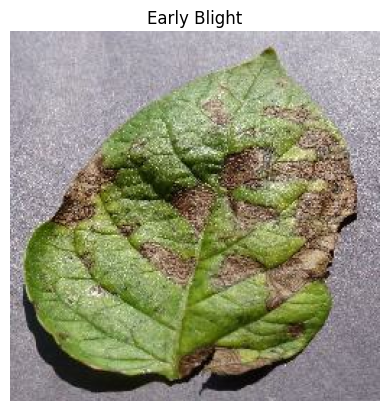

In [88]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype(int))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [5]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [91]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [92]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [94]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [95]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [96]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_15 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (32, 516128)              0         
                                                                 
 dense_10 (Dense)            (32, 64)                  33032256  
                                                     

In [97]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [98]:
history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 51s 919ms/step - loss: 2.8981 - accuracy: 0.6391 - val_loss: 0.3954 - val_accuracy: 0.8490
Epoch 2/50
54/54 [==============================] - 61s 1s/step - loss: 0.2684 - accuracy: 0.9032 - val_loss: 0.1711 - val_accuracy: 0.9524
Epoch 3/50
54/54 [==============================] - 53s 935ms/step - loss: 0.2098 - accuracy: 0.9178 - val_loss: 0.1310 - val_accuracy: 0.9688
Epoch 4/50
54/54 [==============================] - 54s 972ms/step - loss: 0.1387 - accuracy: 0.9536 - val_loss: 0.1351 - val_accuracy: 0.9479
Epoch 5/50
54/54 [==============================] - 39s 676ms/step - loss: 0.1530 - accuracy: 0.9472 - val_loss: 0.2575 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 40s 719ms/step - loss: 0.1286 - accuracy: 0.9525 - val_loss: 0.4216 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 46s 827ms/step - loss: 0.1552 - accuracy: 0.9378 - val_loss: 0.1356 - val_accuracy: 0.9531
Ep

In [100]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 69ms/step - loss: 0.1108 - accuracy: 0.9570


In [101]:
scores

[0.11075499653816223, 0.95703125]

In [103]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
history.history["accuracy"]

[0.63908451795578,
 0.9031690359115601,
 0.9178240895271301,
 0.95363849401474,
 0.9471830725669861,
 0.952464759349823,
 0.9377934336662292,
 0.922535240650177,
 0.9606807231903076,
 0.9612675905227661,
 0.9565727710723877,
 0.9559859037399292,
 0.9653756022453308,
 0.966549277305603,
 0.952464759349823,
 0.9542253613471985,
 0.9577465057373047,
 0.9460093975067139,
 0.9671361446380615,
 0.9706572890281677,
 0.9670138955116272,
 0.9636150002479553,
 0.9718309640884399,
 0.9706572890281677,
 0.9630281925201416,
 0.9716435074806213,
 0.9565972089767456,
 0.9706572890281677,
 0.9728009104728699,
 0.9624413251876831,
 0.9759389758110046,
 0.9646990895271301,
 0.9794601202011108,
 0.9560185074806213,
 0.9747652411460876,
 0.9718309640884399,
 0.9724178314208984,
 0.9675925970077515,
 0.9728009104728699,
 0.9659624695777893,
 0.9823943376541138,
 0.9771126508712769,
 0.9771126508712769,
 0.9688966870307922,
 0.9735915660858154,
 0.9788732528686523,
 0.9791666865348816,
 0.9671361446380615,


In [107]:
['loss', 'accuracy', 'val_loss', 'val_accuracy']

acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

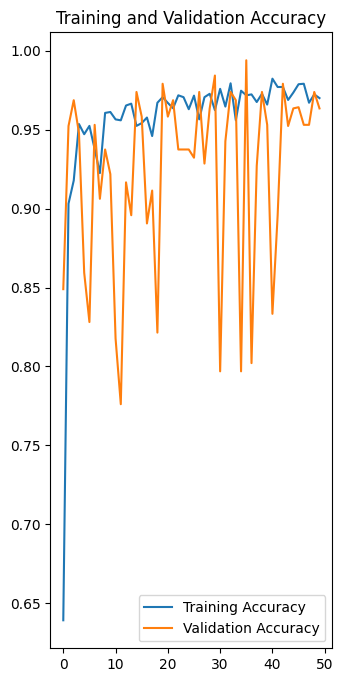

In [108]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

In [7]:
import numpy as np

In [8]:
model = tf.keras.models.load_model("/models/potato_model")

<class 'numpy.ndarray'>
first image to predict
first image actual label is Early Blight
1/1 [==============================] - 0s 176ms/step
Model Prediction is Early Blight


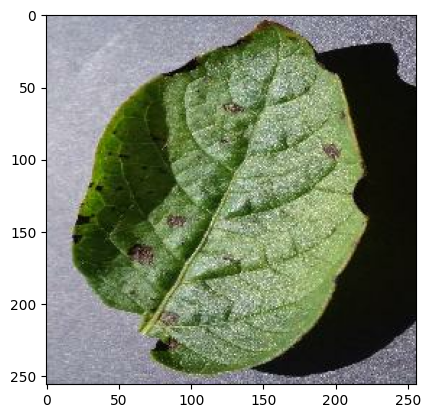

In [12]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    second_image = images_batch[1].numpy().astype("uint8")
    third_image = images_batch[2].numpy().astype("uint8")

    print(type(first_image))

    first_label = class_names[labels_batch[0].numpy()]
    second_label = class_names[labels_batch[1].numpy()]
    third_label = class_names[labels_batch[2].numpy()]

    print("first image to predict")
    print("first image actual label is", first_label)

    plt.imshow(first_image)

    batch_prediction = model.predict(images_batch)
    print("Model Prediction is", class_names[np.argmax(batch_prediction[0])])

In [127]:
model.save("./models/potato_model")

INFO:tensorflow:Assets written to: ./models/potato_model\assets


INFO:tensorflow:Assets written to: ./models/potato_model\assets
